# Importing Initial necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Dataset

In [3]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df = df.sample(frac = 1)

In the cell above, I just have the reshuffled the dataset.

In [7]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5076,red,7.0,0.805,0.00,2.5,0.068,7.0,20.0,0.99690,3.48,0.56,9.6,5
4027,white,6.4,0.260,0.26,1.1,0.052,22.0,176.0,0.99304,3.09,0.54,9.3,5
5128,red,5.2,0.480,0.04,1.6,0.054,19.0,106.0,0.99270,3.54,0.62,12.2,7
2064,white,6.6,0.220,0.28,4.9,0.042,51.0,180.0,0.99520,3.30,0.75,9.5,6
5026,red,8.0,0.590,0.16,1.8,0.065,3.0,16.0,0.99620,3.42,0.92,10.5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,white,6.3,0.130,0.42,1.1,0.043,63.0,146.0,0.99066,3.13,0.72,11.2,7
3941,white,4.9,0.345,0.34,1.0,0.068,32.0,143.0,0.99138,3.24,0.40,10.1,5
6365,red,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4
1516,white,8.2,0.220,0.49,9.6,0.037,53.0,154.0,0.99510,3.02,0.33,10.6,6


# Data Cleaning

Our dataset contains 13 different columns with 6497 rows.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 5076 to 431
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


As we can see, the number of elements in each row are varying. There are null values in the dataset. I could either replace them by the mean values of the column or drop them. <br>
I decided to drop the null the values. 

In [9]:
df.isnull().any()

type                    False
fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                       True
sulphates                True
alcohol                 False
quality                 False
dtype: bool

Almost half the number of columns contain null values. 

In [10]:
df.dropna(inplace=True) #Dropping null values
df.reset_index(drop=True, inplace=True) # resetting index for new rows. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463 entries, 0 to 6462
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 656.5+ KB


Initially, the dataset consisted of 6497 rows and after dropping the null values, we have lost 34 rows, which should not harm our model.

In [12]:
df.isnull().any() #verifying if any null values are there in the dataset

type                    False
fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

# Data Exploring

In [15]:
bins = [0,5,10]

labels = [0, 1] # 'low'=0, 'high'=1
df['quality_range']= pd.cut(x=df['quality'], bins=bins, labels=labels)

print(df[['quality_range','quality']].head(5))

  quality_range  quality
0             0        5
1             0        5
2             1        7
3             1        6
4             1        7


I have classified each entry as high[1] or low[0] depending on the quality of wine. <br>
I also also added that quality range column to the existing dataset. <br>
I have used to pd.cut in the above code to segregate each quality as high or low. 

In [17]:
df.columns #printing column names

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'quality_range'],
      dtype='object')

In [18]:
import seaborn as sns #importing seaborn for plotting

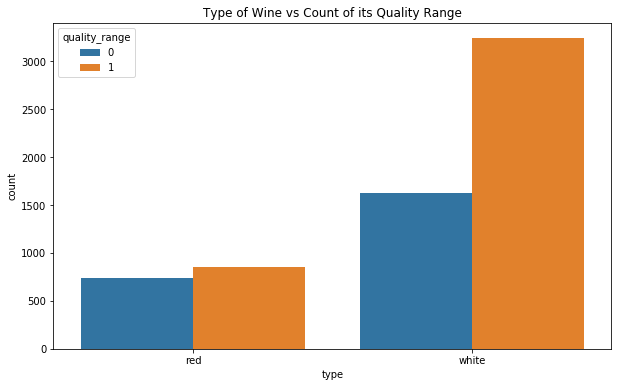

In [22]:
plt.figure(figsize=(10,6))

sns.countplot(x = 'type', hue = 'quality_range', data = df1).set_title('Type of Wine vs Count of its Quality Range')
plt.show()
# Plotting the type of wine(red, white) vs the count of its quality range. 
# This plot shows that the white wine has better quality.

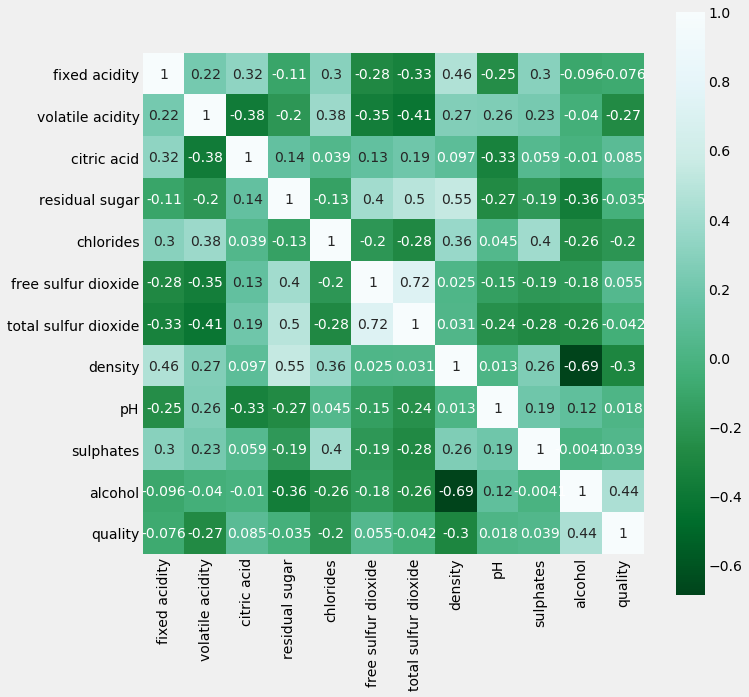

In [214]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,0:13].corr(), cbar = True,  square = True, annot=True, cmap= 'BuGn_r')
# plotting correlation plot between the features of the our dataframe

Quality of wine has high correlation with alcohol content.
Highly correlated

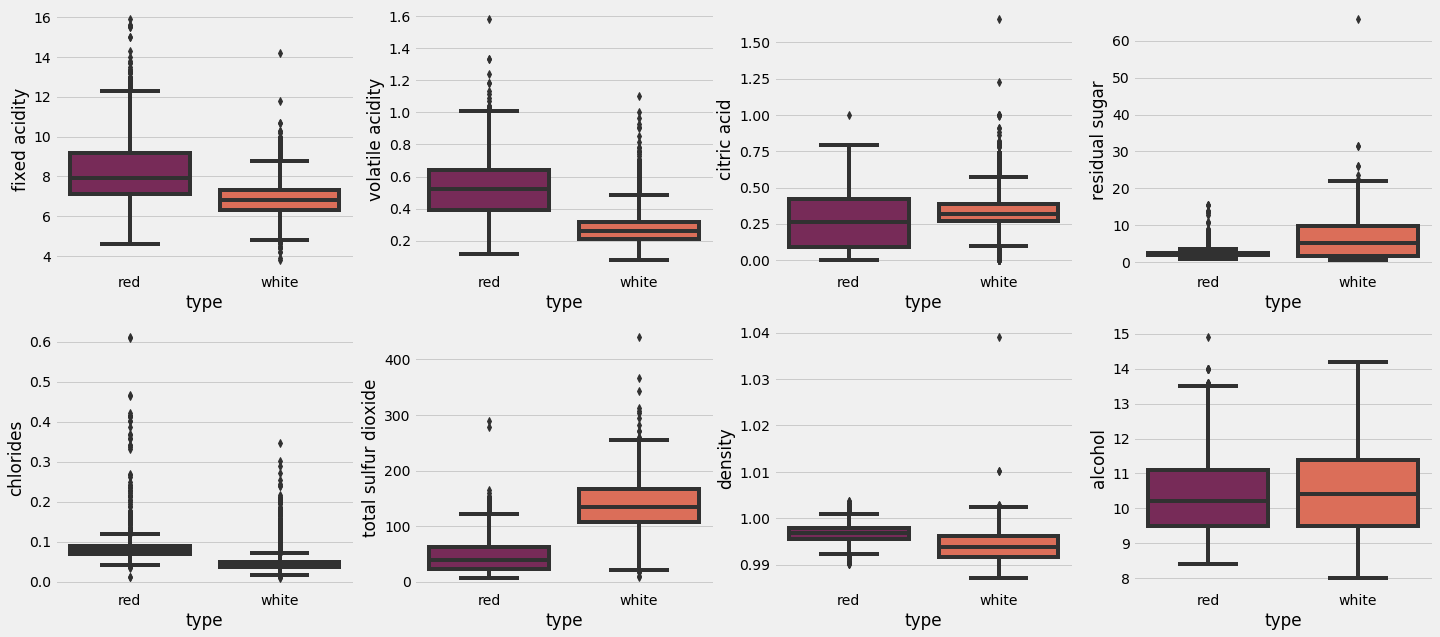

In [223]:
fig = plt.figure(figsize=(22,10))
features = ["fixed acidity", "volatile acidity", 'citric acid', "residual sugar", "chlorides",
            "total sulfur dioxide", "density", 'alcohol']

for i in range(8):
    ax1 = fig.add_subplot(2,4,i+1)
    sns.boxplot(x="type", y=features[i],data=df, palette="rocket");

Red wine has more acidity than white wine. <br>
Both fixed acidity and volatile acidity is considerably higher in red wine than in white wine.

Fixed Acidity: Acid that contributes to the conservation of the wine. <br>
Volatile Acidity: Amount of acetic acid in the wine. Higher levels are dangerous.<br>
Citric Acid: Usually lower amounts are found. Used to add flavour.<br>
Residual Sugar: Sugar found after fermentation. <br>
Chlorides: Amount of salt in wine. <br>
Density: Density of water. <br>
ph: Describes the acidity or basicity of wine from 0-14. <br>
alcohol: percentage of alcohol present in the wine.

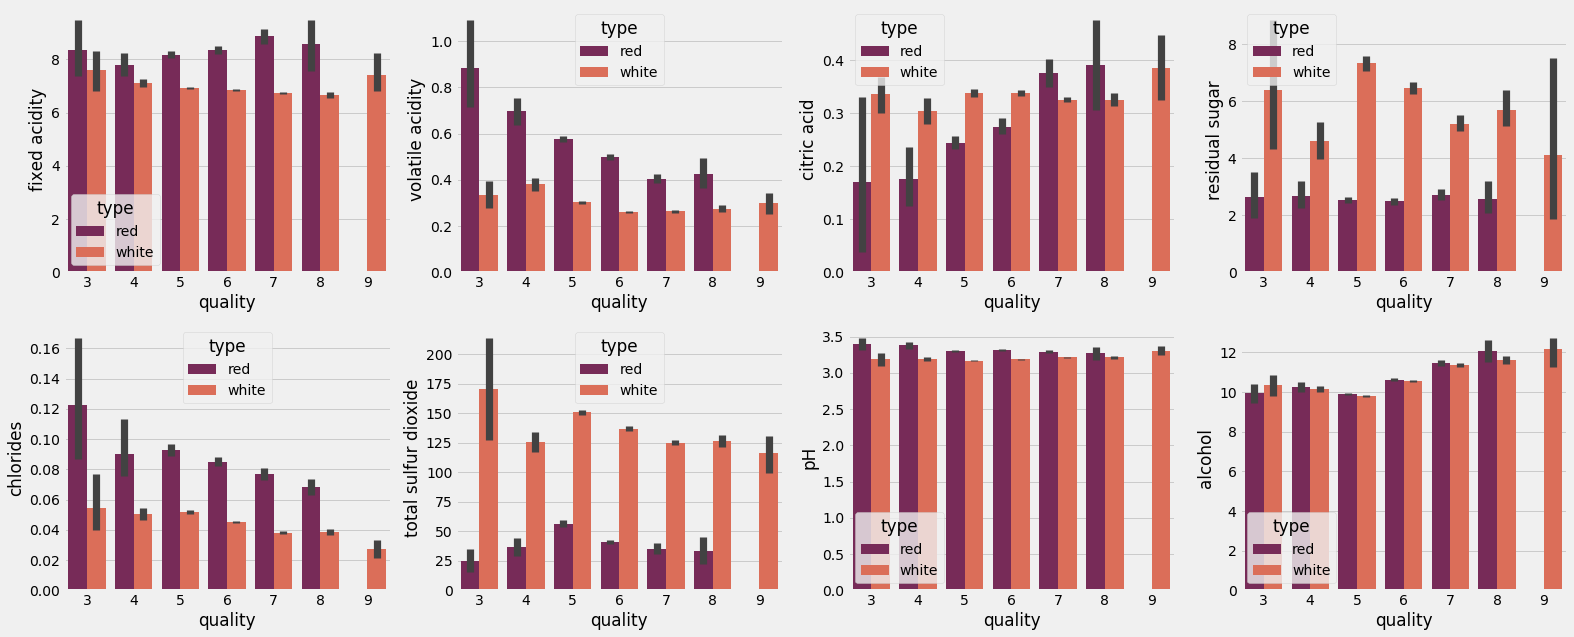

In [226]:
fig = plt.figure(figsize=(24,10))
features = ["fixed acidity", "volatile acidity", 'citric acid', "residual sugar", "chlorides",
            "total sulfur dioxide", "pH", 'alcohol']

for i in range(8):
    ax1 = fig.add_subplot(2,4,i+1)
    sns.barplot(x='quality', y=features[i],data=df, hue='type', palette='rocket')


Some Trends can be seen in the graph above. <br>
1. Quality of Red wine increases with increase in Citric acid content, while white wine is unaffected. 
2. Quality of Red wine decreases wit decrease in volatile acidity. 
3. For better quality of red wine, total sulphur dioxide content should be low. 

# Dividing into Train and Test set

In [162]:
X = df1.drop(['type', 'quality_range'], axis = 1) 
y = df1.quality_range

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

We have divided our data into training and testing sets with 80:20 ratio. <br>
Our X contains all features to the quality of the wine. <br>
The type of wine was removed from the X data. I wanted to see how the model performs when not given the type of wine. <br>
(I ran a model where Type was wine was also included. I gave 0 to White wine and 1 to Red wine and there was not a lot of difference in the accuracy scores. So i did not include them.)

# Logistic Regression

In [229]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()

log_model = log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)
prediction = accuracy_score(y_test, y_pred)
print('Accuracy for Logistic Regression: ', prediction)

Accuracy for Logistic Regression:  0.7308584686774942


C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


My logistic Regression gave an accuracy of 73%. <br>
This is pretty good, but I wanted to see what values do other models give. <br>
But first, lets find the precision, recall and F1 score for Logistic Regression.

In [227]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

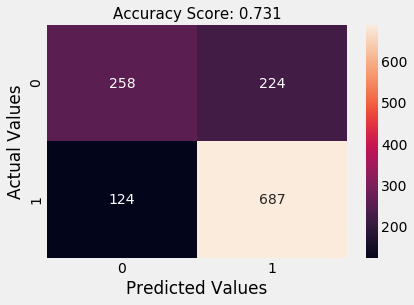

In [230]:
predictions = log_clf.predict(X_test)

score = round(accuracy_score(y_test, predictions), 3)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = '.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {}'.format(score), size = 15)
plt.show()

In [231]:
TN = cm[0][0]
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]

print("True Negative(Total):", TN)
print("True Positive(Total):", TP)
print("False Positive(Total):", FP)
print("False Negative(Total):", FN)

True Negative(Total): 258
True Positive(Total): 687
False Positive(Total): 224
False Negative(Total): 124


I took 687 as my True positive I need more classes to be 1 than 0. <br>
True Positive --> Actual Positive, Predicted Positive. <br>
False Positive --> Actual Negative, Predicted Positive. <br>
True Negative --> Actual Negative, Predicted Negative. <br>
False Negative --> Actual positive, Predicted Negative. 

Precision - out of all the positive instances, how many were predicted correctly. <br>
Precision = TP/(TP + FP)

Recall - out of all positive classes, how many were identified correctly. <br>
Recall = TP/(TP+FN)

F1 Score is needed to seek a balance between Precision and Recall. <br>
Difference between F1 Score and Accuracy?<br>
Accuracy can be largely contributed by a large number of True Negatives which is not given that much importance in real life, whereas False Negative and False Positive usually has business costs (tangible & intangible) thus F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall and there is also an uneven class distribution (large number of Actual Negatives).

In [186]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [196]:
# Printing the accuracy of the model
y_pred = log_clf.predict(X_test)
print("Accuracy Score: ",  accuracy_score(y_test, y_pred))

# Printing the rate of error, which is, 1 - the Accuracy Score
Rate_of_Error = 1- (accuracy_score(y_test, y_pred))  
print('Error Rate: ', Rate_of_Error)

# Printing the precision
print('Precision Score:', precision_score(y_test, y_pred))

# Printing Recall Score
print('Recall Score:', recall_score(y_test, y_pred))

precision_s = precision_score(y_test, y_pred)
recall_s    = recall_score(y_test, y_pred)

print("F1_score: ",  2*((precision_s*recall_s)/(precision_s + recall_s)))

Accuracy Score:  0.7308584686774942
Error Rate:  0.26914153132250584
Precision Score: 0.7541163556531284
Recall Score: 0.8471023427866831
F1_score:  0.7979094076655051


We have a pretty good recall score for logistic regression, but we need precision which also has a decent score of 0.75. <br>
We prefer precision score because we want to see how many the positive classes were identified correctly.

In [197]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,y_pred))
a = f1_score(y_test, y_pred)
b = recall_score(y_test, y_pred)
c = precision_score(y_test, y_pred)
print("f1_score        :", a)
print("recall_score    :", b)
print("precision_score :", c)

print('\n')
metrics =  precision_recall_fscore_support(y_test, y_pred)
print("Precision:" , metrics[0]) 
print("Recall   :" , metrics[1]) 
print("F1 Score :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.68      0.54      0.60       482
           1       0.75      0.85      0.80       811

    accuracy                           0.73      1293
   macro avg       0.71      0.69      0.70      1293
weighted avg       0.72      0.73      0.72      1293

f1_score        : 0.7979094076655051
recall_score    : 0.8471023427866831
precision_score : 0.7541163556531284


Precision: [0.67539267 0.75411636]
Recall   : [0.53526971 0.84710234]
F1 Score : [0.59722222 0.79790941]


# Support Vector Machine

In [202]:
from sklearn.svm import SVC

svm_clf = SVC()

svc_model = svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
prediction = accuracy_score(y_test, y_pred)
print('Accuracy for SVM: ', prediction)

Accuracy for SVM:  0.6272235112142305


Accuracy score of SVM is just 62%. Logisitic regression was a better classifier in this case. 

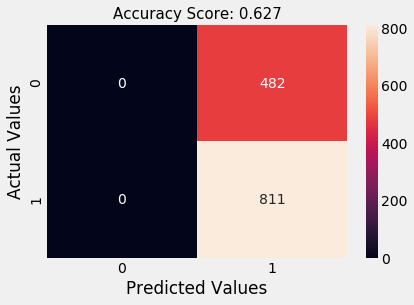

In [203]:
predictions = svm_clf.predict(X_test)

score = round(accuracy_score(y_test, predictions), 3)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = '.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {}'.format(score), size = 15)
plt.show()

In [204]:
TN = cm[0][0]
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]

print("True Negative(Total):", TN)
print("True Positive(Total):", TP)
print("False Positive(Total):", FP)
print("False Negative(Total):", FN)

True Negative(Total): 0
True Positive(Total): 811
False Positive(Total): 482
False Negative(Total): 0


In [206]:
y_pred = svm_clf.predict(X_test)
print("Accuracy Score: ",  accuracy_score(y_test, y_pred))

# Printing the rate of error, which is, 1 - the Accuracy Score
Rate_of_Error = 1- (accuracy_score(y_test, y_pred))  
print('Error Rate: ', Rate_of_Error)

# Printing the precision
print('Precision Score:', precision_score(y_test, y_pred))

# Printing Recall Score
print('Recall Score:', recall_score(y_test, y_pred))

precision_s = precision_score(y_test, y_pred)
recall_s    = recall_score(y_test, y_pred)

print("F1_score: ",  2*((precision_s*recall_s)/(precision_s + recall_s)))

Accuracy Score:  0.6272235112142305
Error Rate:  0.3727764887857695
Precision Score: 0.6272235112142305
Recall Score: 1.0
F1_score:  0.7709125475285171


Precision is lower than that of Logistic Regression.

# Random Forest Classifier

In [208]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier()

rnd_model = rnd_clf.fit(X_train, y_train)
y_pred = rnd_model.predict(X_test)
prediction = accuracy_score(y_test, y_pred)
print('Accuracy for Random Forest: ', prediction)

Accuracy for Random Forest:  0.8128383604021655


Our Best classifier with an accuracy score of 0.82.

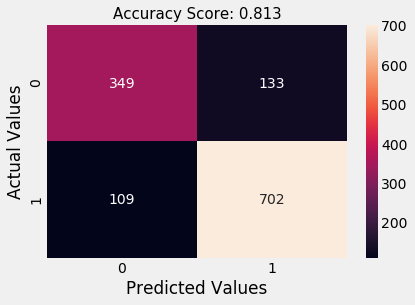

In [209]:
predictions = rnd_clf.predict(X_test)

score = round(accuracy_score(y_test, predictions), 3)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = '.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {}'.format(score), size = 15)
plt.show()

In [210]:
TN = cm[0][0]
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]

print("True Negative(Total):", TN)
print("True Positive(Total):", TP)
print("False Positive(Total):", FP)
print("False Negative(Total):", FN)

True Negative(Total): 349
True Positive(Total): 702
False Positive(Total): 133
False Negative(Total): 109


In [211]:
y_pred = rnd_clf.predict(X_test)
print("Accuracy Score: ",  accuracy_score(y_test, y_pred))

# Printing the rate of error, which is, 1 - the Accuracy Score
Rate_of_Error = 1- (accuracy_score(y_test, y_pred))  
print('Error Rate: ', Rate_of_Error)

# Printing the precision
print('Precision Score:', precision_score(y_test, y_pred))

# Printing Recall Score
print('Recall Score:', recall_score(y_test, y_pred))

precision_s = precision_score(y_test, y_pred)
recall_s    = recall_score(y_test, y_pred)

print("F1_score: ",  2*((precision_s*recall_s)/(precision_s + recall_s)))

Accuracy Score:  0.8128383604021655
Error Rate:  0.1871616395978345
Precision Score: 0.8407185628742515
Recall Score: 0.8655980271270037
F1_score:  0.8529769137302552


Even the Precision Score is better in Random Forest than Logisitic or Support Vector Machines.

# Decision Tree(Gini and Entropy)

In [118]:
from sklearn.tree import DecisionTreeClassifier

dtc_clf = DecisionTreeClassifier()

clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
gini_model = clf_gini.fit(X_train, y_train) 
y_pred = gini_model.predict(X_test)
prediction_gini = accuracy_score(y_test, y_pred)
print('Accuracy for Decision Tree(Gini): ', prediction_gini)

clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
entropy_model = clf_entropy.fit(X_train, y_train) 
y_pred = entropy_model.predict(X_test)
prediction_entropy = accuracy_score(y_test, y_pred)
print('Accuracy for Decision Tree(Entropy): ', prediction_entropy)

Accuracy for Decision Tree(Gini):  0.7331786542923434
Accuracy for Decision Tree(Entropy):  0.7331786542923434


In [232]:
predictions = clf_gini.predict(X_test)

score = round(accuracy_score(y_test, predictions), 3)
cm = confusion_matrix(y_test, predictions)
print('Precision Score:', precision_score(y_test, y_pred))

Precision Score: 0.7541163556531284


In [233]:
predictions = entropy_model.predict(X_test)

score = round(accuracy_score(y_test, predictions), 3)
cm = confusion_matrix(y_test, predictions)
print('Precision Score:', precision_score(y_test, y_pred))

Precision Score: 0.7541163556531284


Both our Decision Trees gave the same accuracy. <br>
The Precision for both of them is 0.75, which is lower than of Random Forest,

# General Decision Tree using bagging Classifier

In [108]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, 
                            bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
prediction = accuracy_score(y_test, y_pred)
print('Accuracy for Bagging Classifier: ', prediction)

Accuracy for Bagging Classifier:  0.7447795823665894


The Bagging Classifier of decisiom tree also gave a similar output. <br>
I did not calculate the precision as it would be the same as the decision tree of entropy and gini model. 

# Out of Bag Score for Decision Trees

In [119]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=500,
                            bootstrap=True, n_jobs=-1, oob_score=True)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_
y_pred = bag_clf.predict(X_test)
print('Accuracy for Decision Tree Bagging Classification:', accuracy_score(y_test, y_pred))

Accuracy for Decision Tree Bagging Classification: 0.8151585460170147


With Bagging, there are some instances that was classified many times and some instances which dont get classified even once. Meaning that only 80% of the training instances are sampled on average for each predictor. The remaining 20% of the training instances that are not sampled are called out-of-bag (oob) instances. <br>
Since a predictor never sees the oob instances during training, we can evaluate the ensemble itself by averaging out the oob evaluations of each predictor.<br>
Basically, Out of bag score is the score where the model runs on the instances which were not taken in consideration and gives its accuracy on that set. <br>
It is a substitute validation set.

# Adaptive Boosting Classifier

In [120]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
prediction = accuracy_score(y_test, y_pred)
print('Accuracy for Ada Boost Classification:', accuracy_score(y_test, y_pred))

Accuracy for Ada Boost Classification: 0.748646558391338


# Voting Classifier
Voting classifier consisting of Logistic Regession, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier and Adaptive Boosting.

In [236]:
voting_clf = VotingClassifier(
estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('dtc', bag_clf1), ('ada', adaboost)],
voting = 'hard')
voting_clf.fit(X_train, y_train)

C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [237]:
for clf in (log_clf, rnd_clf,svm_clf, bag_clf1, adaboost, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression 0.7308584686774942
RandomForestClassifier 0.8174787316318639
SVC 0.6272235112142305
DecisionTreeClassifier 0.7633410672853829
AdaBoostClassifier 0.7478731631863882


C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier 0.7842227378190255


In [234]:
voting_clf = VotingClassifier(
estimators = [('lr', log_clf), ('rf', rnd_clf), ('dtc', bag_clf1), ('ada', adaboost)],
voting = 'hard')
voting_clf.fit(X_train, y_train)

C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [235]:
for clf in (log_clf, rnd_clf, bag_clf1, adaboost, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression 0.7308584686774942
RandomForestClassifier 0.8128383604021655
DecisionTreeClassifier 0.7633410672853829
AdaBoostClassifier 0.7478731631863882


C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier 0.7896365042536736


Since the lowest accuracy score was by Support vector machines, I tried to run it once with support vector machine and once without. <br>
That did not change the accuracy score of our Voting Classifier.

# K-Fold Cross Validation (Logistic Regression)

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.<br>

The procedure has k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation. <br>
Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. <br>

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
a)Take the group as a hold out or test data set. <br>
b)Take the remaining groups as a training data set. <br>
c)Fit a model on the training set and evaluate it on the test set. <br>
d)Retain the evaluation score and discard the model. <br>
4. Summarize the skill of the model using the sample of model evaluation scores

Below, I have applied K-fold cross validation to all the models I have used above. <br>
I am using 5 folds to divide the dataset. 

In [ ]:
from sklearn.model_selection import KFold 
kfold = KFold(n_splits=5, shuffle=True)

In [126]:
scores = []
for i in range(5):
    result = next(kfold.split(df), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = log_clf.fit(x_train, y_train)
    predictions = logisticRegr.predict(x_test)
    scores.append(model.score(x_test, y_test))
print('Scores:', scores)
print('Average K-Fold Score: ', np.mean(scores))

C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Scores: [0.728538283062645, 0.7231245166279969, 0.7331786542923434, 0.7293116782675947, 0.7300850734725445]
Average K-Fold Score:  0.7288476411446249


C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# K-Fold Cross Validation (Random Forest)

In [129]:
scores = []
for i in range(5):
    result = next(kfold.split(df), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = rnd_clf.fit(x_train, y_train)
    predictions = rnd_clf.predict(x_test)
    scores.append(model.score(x_test, y_test))
print('Scores:', scores)
print('Average K-Fold Score: ', np.mean(scores))

Scores: [0.8167053364269141, 0.839907192575406, 0.8344934261407579, 0.8422273781902552, 0.819798917246713]
Average K-Fold Score:  0.8306264501160092


# K-Fold Cross Validation (Support Vector Machine)

In [130]:
scores = []
for i in range(5):
    result = next(kfold.split(df), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = svm_clf.fit(x_train, y_train)
    predictions = svm_clf.predict(x_test)
    scores.append(model.score(x_test, y_test))
print('Scores:', scores)
print('Average K-Fold Score: ', np.mean(scores))

Scores: [0.6558391337973705, 0.6272235112142305, 0.6434648105181748, 0.6194895591647331, 0.6481051817478731]
Average K-Fold Score:  0.6388244392884763


# K-Fold Cross Validation (Decision Tree Classifier)

In [131]:
scores = []
for i in range(5):
    result = next(kfold.split(df), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = bag_clf1.fit(x_train, y_train)
    predictions = bag_clf1.predict(x_test)
    scores.append(model.score(x_test, y_test))
print('Scores:', scores)
print('Average K-Fold Score: ', np.mean(scores))

Scores: [0.7733952049497294, 0.7811291569992266, 0.7849961330239753, 0.7703016241299304, 0.7834493426140758]
Average K-Fold Score:  0.7786542923433875


# K-Fold Cross Validation (Adaptive Boosting)

In [132]:
scores = []
for i in range(5):
    result = next(kfold.split(df), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = adaboost.fit(x_train, y_train)
    predictions = adaboost.predict(x_test)
    scores.append(model.score(x_test, y_test))
print('Scores:', scores)
print('Average K-Fold Score: ', np.mean(scores))

Scores: [0.7587006960556845, 0.7432327919566899, 0.7788089713843774, 0.765661252900232, 0.7610208816705336]
Average K-Fold Score:  0.7614849187935036


# XGBoost 

XGBoost is another boosting method used generally, but it is not supported by scikit-learn. <br>
Have to download it separately.

In [133]:
import xgboost as xgb

In [134]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [135]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20

In [136]:
model = xgb.train(param, D_train, steps)

In [138]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.4822274881516587
Recall = 0.49843786963990006
Accuracy = 0.6249033255993813


The model did not give a good output. <br>
With an accuracy score of 0.62 and a mere .48 precision score, we decided not to include it further. 

# Cross Validation (Logistic Regression)

In the last part of my project, I have just taken the values for the k-fold cross validation into consideration and tried to get the mean of each of its precision and recall. <br>
They did not change drastically than the original train-test split.

In [140]:
from sklearn.model_selection import cross_validate, cross_val_score

cv = cross_validate(estimator=log_clf, 
                     X=X,
                     y=y,
                     cv=10,return_train_score=True,
                     scoring = ['accuracy', 'precision']
                    )

C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [141]:
print('Test Set Accuracy(Mean): {:.2f}'.format(cv['test_accuracy'].mean()))
print('Test Set Precision(Mean): {:.2f}'.format(cv['test_precision'].mean()))

Test Set Accuracy(Mean): 0.74
Test Set Precision(Mean): 0.76


# Cross Validation (Random Forest)

In [143]:
cv = cross_validate(estimator=rnd_clf, 
                     X=X,
                     y=y,
                     cv=10,return_train_score=True,
                     scoring = ['accuracy', 'precision']
                    )
print('Test Set Accuracy(Mean): {:.2f}'.format(cv['test_accuracy'].mean()))
print('Test Set Precision(Mean): {:.2f}'.format(cv['test_precision'].mean()))

Test Set Accuracy(Mean): 0.84
Test Set Precision(Mean): 0.86


# Cross Validation (Support Vector Machine)

In [144]:
cv = cross_validate(estimator=svm_clf, 
                     X=X,
                     y=y,
                     cv=10,return_train_score=True,
                     scoring = ['accuracy', 'precision']
                    )
print('Test Set Accuracy(Mean): {:.2f}'.format(cv['test_accuracy'].mean()))
print('Test Set Precision(Mean): {:.2f}'.format(cv['test_precision'].mean()))

Test Set Accuracy(Mean): 0.63
Test Set Precision(Mean): 0.63


# Cross Validation (Decision Tree Classifier)

In [145]:
cv = cross_validate(estimator=bag_clf1, 
                     X=X,
                     y=y,
                     cv=10,return_train_score=True,
                     scoring = ['accuracy', 'precision']
                    )
print('Test Set Accuracy(Mean): {:.2f}'.format(cv['test_accuracy'].mean()))
print('Test Set Precision(Mean): {:.2f}'.format(cv['test_precision'].mean()))

Test Set Accuracy(Mean): 0.79
Test Set Precision(Mean): 0.83


# Cross Validation (Adaptive Boosting)

In [146]:
cv = cross_validate(estimator=adaboost, 
                     X=X,
                     y=y,
                     cv=10,return_train_score=True,
                     scoring = ['accuracy', 'precision']
                    )
print('Test Set Accuracy(Mean): {:.2f}'.format(cv['test_accuracy'].mean()))
print('Test Set Precision(Mean): {:.2f}'.format(cv['test_precision'].mean()))

Test Set Accuracy(Mean): 0.75
Test Set Precision(Mean): 0.78


# Grid CV search (Logistic Regression)

I even tried to run Grid CV Search for just logistic regression and tried to give penalties. <br>
(I ran out of time due to the last minute change of my dataset. So this was the only grid CV search I could run.)

In [147]:
grid_parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [149]:
grid_cv = GridSearchCV(estimator=log_clf,
                       param_grid = grid_parameters,
                       cv = 10
                      )
grid_cv.fit(X, y)

C:\Users\daks5\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\daks5\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation

C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\daks5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [150]:
print("The Best Parameter : ", grid_cv.best_params_)
print("The Best Score     : ", grid_cv.best_score_)

The Best Parametre :  {'C': 100, 'penalty': 'l2'}
The Best Score     :  0.7414540077806115


In [151]:
results = grid_cv.cv_results_
df3 = pd.DataFrame(results)

In [152]:
df3 = df3[['param_penalty','param_C', 'mean_test_score']]
df3 = df3.sort_values(by='mean_test_score', ascending = False)
df3

,param_penalty,param_C,mean_test_score
15,l2,100,0.741454
17,l2,1000,0.737277
19,l2,10000,0.736814
13,l2,10,0.736039
11,l2,1,0.735419
9,l2,0.1,0.728145
7,l2,0.01,0.715613
5,l2,0.001,0.683897
3,l2,0.0001,0.638868
1,l2,1e-05,0.634380
